## Introduction to Recommender Systems

In today’s technology-driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.
Ever wondered how Netflix, Amazon Prime, Showmax, Disney and the likes somehow know what to recommend to you?
it's not just a guess drawn out of the hat. There is an algorithm behind it.

In recommendation system, there are two main approaches in the prediction - content based and collaborative filtering. Simply put Collaborative Filtering uses user interaction data, while Content-Based Filtering relies on item characteristics for personalized recommendations. There is also a third - hybrid approach which has become a hot cake for the big tech companies. In this project, collaborative filtering will be used to make recommendation for the movies that have been curated from reliable sources.


## Installing Packages

In [1]:
# Packages for data processing
import numpy as np
import pandas as pd
import datetime
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
import re
from scipy.sparse import csr_matrix
import scipy as sp


# Packages for visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Packages for modeling
from surprise import Reader
from surprise import Dataset
from surprise import KNNWithMeans
from surprise import KNNBasic
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering
import heapq

# Packages for model evaluation
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from time import time

# Package to suppress warnings
import warnings
warnings.filterwarnings("ignore")

# Packages for saving models
import pickle

## Reading in data and perform EDA

In [2]:
train_df = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/train.csv')
movies_df = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/movies.csv')
imdb_df = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/imdb_data.csv')
test_df = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/test.csv')
links_df = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/links.csv')
tags = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/tags.csv')
genome_scores = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/genome_scores.csv')
genome_tags = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/genome_tags.csv')
sample_submissions = pd.read_csv('C:/Users/User1/Downloads/DS Machine Learning/UNSUPERVISED LEARNING/WEBINAR RESOURCES/alx-movie-recommendation-project-2024/sample_submission.csv')

In [3]:
movies_df.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
train_df.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


In [5]:
imdb_df.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


In [6]:
test_df.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


In [7]:
links_df.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


In [8]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


In [9]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


In [10]:
print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId      0
imdbId       0
tmdbId     107
dtype: int64
************
IMDB: 
movieId              0
title_cast       10068
director          9874
runtime          12089
budget           19372
plot_keywords    11078
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


In [11]:
imdb_df = imdb_df.dropna()
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6963 entries, 0 to 27274
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movieId        6963 non-null   int64  
 1   title_cast     6963 non-null   object 
 2   director       6963 non-null   object 
 3   runtime        6963 non-null   float64
 4   budget         6963 non-null   object 
 5   plot_keywords  6963 non-null   object 
dtypes: float64(1), int64(1), object(4)
memory usage: 380.8+ KB


In [12]:
links_df = links_df.dropna()
links_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 62316 entries, 0 to 62422
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  62316 non-null  int64  
 1   imdbId   62316 non-null  int64  
 2   tmdbId   62316 non-null  float64
dtypes: float64(1), int64(2)
memory usage: 1.9 MB


In [13]:
print("Train: ")
print(str(train_df.isnull().sum()))
print("************")
print("Test: ")
print(str(test_df.isnull().sum()))
print("************")
print("Movies: ")
print(str(movies_df.isnull().sum()))
print("************")
print("Links: ")
print(str(links_df.isnull().sum()))
print("************")
print("IMDB: ")
print(str(imdb_df.isnull().sum()))
print("************")
print("Genome scores: ")
print(str(genome_scores.isnull().sum()))
print("************")
print("Genome tags: ")
print(str(genome_tags.isnull().sum()))

Train: 
userId       0
movieId      0
rating       0
timestamp    0
dtype: int64
************
Test: 
userId     0
movieId    0
dtype: int64
************
Movies: 
movieId    0
title      0
genres     0
dtype: int64
************
Links: 
movieId    0
imdbId     0
tmdbId     0
dtype: int64
************
IMDB: 
movieId          0
title_cast       0
director         0
runtime          0
budget           0
plot_keywords    0
dtype: int64
************
Genome scores: 
movieId      0
tagId        0
relevance    0
dtype: int64
************
Genome tags: 
tagId    0
tag      0
dtype: int64


In [14]:
# Create dataframe containing only the movieId and genres
movies_genres = pd.DataFrame(movies_df[['movieId', 'genres']],
                             columns=['movieId', 'genres'])

# Split genres seperated by "|" and create a list containing the genres allocated to each movie
movies_genres.genres = movies_genres.genres.apply(lambda x: x.split('|'))

# Create expanded dataframe where each movie-genre combination is in a seperate row
movies_genres = pd.DataFrame([(tup.movieId, d) for tup in movies_genres.itertuples() for d in tup.genres],
                             columns=['movieId', 'genres'])

movies_genres.head()

,movieId,genres
0,1,Adventure
1,1,Animation
2,1,Children
3,1,Comedy
4,1,Fantasy


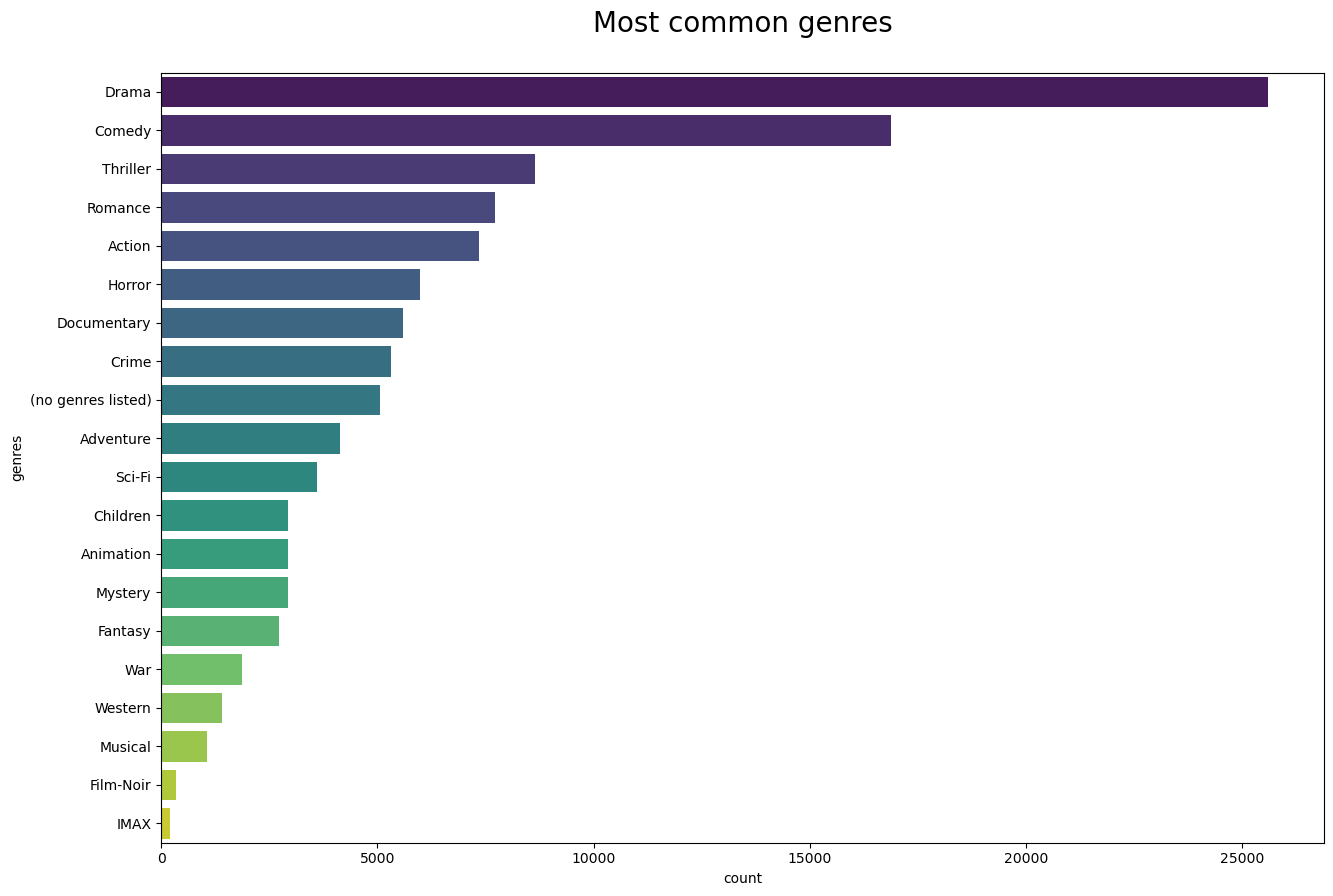

In [15]:
plot = plt.figure(figsize=(15, 10))
plt.title('Most common genres\n', fontsize=20)
sns.countplot(y="genres", data=movies_genres,
              order=movies_genres['genres'].value_counts(ascending=False).index,
              palette='viridis')
plt.show()

## Employing Collaborative Filtering Method

In [16]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

# Sample a fraction of the training data for efficiency
sampled_train_data = train_df.sample(frac=0.8, random_state= 42)

# Define the Reader and Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(sampled_train_data[['userId', 'movieId', 'rating']], reader)

# Split the data into training and validation sets
trainset, testset = train_test_split(data, test_size=0.2, random_state= 42)

# Initialize the SVD algorithm
algo = SVD()

# Train the algorithm on the training set
algo.fit(trainset)

# Evaluate the algorithm on the test set
predictions = algo.test(testset)
print("RMSE:", accuracy.rmse(predictions))
pred = pd.DataFrame(predictions)
pred.head()

RMSE: 0.8488
RMSE: 0.8487769721375822


,uid,iid,r_ui,est,details
0,112405,1230,5.0,3.965230,{'was_impossible': False}
1,107632,3507,3.0,3.344824,{'was_impossible': False}
2,23387,1041,5.0,4.567636,{'was_impossible': False}
3,53435,1721,5.0,4.075323,{'was_impossible': False}
4,18205,3087,4.0,3.172362,{'was_impossible': False}


In [21]:
import pandas as pd
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split, GridSearchCV

# Sample a fraction of the training data for efficiency
sampled_train_data = train_df.sample(frac=0.7, random_state=42)

# Define the Reader and Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(sampled_train_data[['userId', 'movieId', 'rating']], reader)


# Define a smaller parameter grid
param_grid = {
    'n_factors': [50, 100],
    'n_epochs': [20, 30],
    'lr_all': [0.005, 0.01],
    'reg_all': [0.1, 0.2]
}

# Initialize the GridSearchCV object
gs = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=3)

# Perform the grid search
gs.fit(data)

# Get the best parameters and best score
best_params = gs.best_params['rmse']
best_score = gs.best_score['rmse']

print("Best RMSE score: ", best_score)
print("Best parameters: ", best_params)

# Use the best algorithm with the optimal parameters
algo = SVD(**best_params)

# Split the data into training and validation sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Train the algorithm on the training set
algo.fit(trainset)

# Evaluate the algorithm on the test set
predictions = algo.test(testset)
print("RMSE:", accuracy.rmse(predictions))

Best RMSE score:  0.8562407273359257
Best parameters:  {'n_factors': 100, 'n_epochs': 30, 'lr_all': 0.01, 'reg_all': 0.1}
RMSE: 0.8507
RMSE: 0.8506610853368508


In [17]:
from surprise import Reader, Dataset, SVD, accuracy
from surprise.model_selection import train_test_split

# Sample a fraction of the training data for efficiency
sampled_train_df = train_df.sample(frac=0.6, random_state=42)  # Adjust the fraction as needed

# Define the Reader and Dataset
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(sampled_train_df[['userId', 'movieId', 'rating']], reader)

# Split the data into training and validation sets
trainset, testset = train_test_split(data, test_size=0.2, random_state=42)

# Initialize the SVD algorithm
algo = SVD()

# Train the algorithm on the training set
algo.fit(trainset)

# Optimized function to get collaborative recommendations for a user profile
def get_collaborative_recommendations(user_id, algo, movies_data, ratings_df, n=10):
    # Sample a fraction of the movies to predict ratings
    sampled_movies = movies_data.sample(frac=0.6, random_state=42)  # Adjust the fraction as needed
    
    recommendations = []

    for _, movie_row in sampled_movies.iterrows():
        movie_id = movie_row['movieId']
        title = movie_row['title']
        prediction = algo.predict(user_id, movie_id).est
        actual_rating = ratings_df[(ratings_df['userId'] == user_id) & (ratings_df['movieId'] == movie_id)]['rating']
        actual_rating = actual_rating.values[0] if not actual_rating.empty else None
        recommendations.append((title, prediction, actual_rating))

    # Sort the recommendations by predicted rating in descending order
    recommendations = sorted(recommendations, key=lambda x: x[1], reverse=True)

    return recommendations[:n]

# Example usage: Get top 10 recommendations for a specific user
user_id = 1  # Replace with a valid user ID
top_10_recommendations = get_collaborative_recommendations(user_id, algo, movies_df, train_df, n=10)

# Convert the recommendations to a DataFrame for display
recommendations_df = pd.DataFrame(top_10_recommendations, columns=['Recommended Movie', 'Predicted Rating', 'Actual Rating'])

print(recommendations_df)

                                   Recommended Movie  Predicted Rating  \
0                             Planet Earth II (2016)          4.271654   
1   Wings of Desire (Himmel über Berlin, Der) (1987)          4.264092   
2                                     Yojimbo (1961)          4.262800   
3                   Sanjuro (Tsubaki Sanjûrô) (1962)          4.182727   
4                           Good Will Hunting (1997)          4.179351   
5  Exterminating Angel, The (Ángel exterminador, ...          4.166918   
6                                    Rushmore (1998)          4.157684   
7                   Shawshank Redemption, The (1994)          4.139320   
8                            Jean de Florette (1986)          4.134831   
9                                  Fight Club (1999)          4.115922   

  Actual Rating  
0          None  
1          None  
2          None  
3          None  
4          None  
5          None  
6          None  
7          None  
8          None  
9    

In [18]:
# Function to generate predictions for the test set and prepare the submission file
def generate_submission(algo, test_df):
    predictions = []

    for _, row in test_df.iterrows():
        user_id = row['userId']
        movie_id = row['movieId']
        prediction = algo.predict(user_id, movie_id).est
        predictions.append((f"{user_id}_{movie_id}", prediction))

    # Create a DataFrame with the predictions
    submission = pd.DataFrame(predictions, columns=['Id', 'rating'])

    # Save the DataFrame to a CSV file
    submission.to_csv('submission.csv', index=False)

    return submission

# Generate the submission file
submission_df = generate_submission(algo, test_df)

# Verify the submission file
print(submission_df.head())

       Id    rating
0  1_2011  3.327419
1  1_4144  3.610492
2  1_5767  2.978008
3  1_6711  3.605172
4  1_7318  3.245961


In [19]:
submission_df.shape

(5000019, 2)

In [20]:
submission_df.to_csv('submission_1.csv', index=False)